<a href="https://colab.research.google.com/github/vberestyukova/Data-analysis-and-machine-learning/blob/main/BerestyukovaV_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("lab.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0


In [ ]:
le = preprocessing.LabelEncoder()
df["x1"] = le.fit_transform(df["x1"])
df

,x1,x2,x3,x4,x5,target
0,3,6.0,10.0,684.853714,489.727534,127000.0
1,2,6.0,5.0,787.439842,129.226659,54200.0
2,2,7.0,8.0,934.334854,996.189811,107600.0
3,1,7.0,7.0,507.949612,553.560324,91800.0
4,1,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,3,8.0,5.0,827.094070,4.385557,61800.0
996,3,7.0,6.0,842.487798,164.747387,53800.0
997,3,10.0,7.0,497.651151,639.352422,122800.0
998,3,8.0,6.0,282.684179,194.777096,84400.0


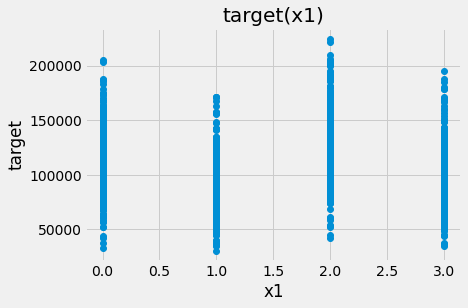

In [ ]:
plt.xlabel("x1")
plt.ylabel("target")
plt.title("target(x1)")
plt.plot(df.x1, df.target, 'o')

In [ ]:
le.classes_

array(['весна', 'зима', 'лето', 'осень'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['x1'], prefix= 'seаson')
df

,x2,x3,x4,x5,target,seаson_0,seаson_1,seаson_2,seаson_3
0,6.0,10.0,684.853714,489.727534,127000.0,0,0,0,1
1,6.0,5.0,787.439842,129.226659,54200.0,0,0,1,0
2,7.0,8.0,934.334854,996.189811,107600.0,0,0,1,0
3,7.0,7.0,507.949612,553.560324,91800.0,0,1,0,0
4,10.0,10.0,154.831480,88.940079,171500.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,8.0,5.0,827.094070,4.385557,61800.0,0,0,0,1
996,7.0,6.0,842.487798,164.747387,53800.0,0,0,0,1
997,10.0,7.0,497.651151,639.352422,122800.0,0,0,0,1
998,8.0,6.0,282.684179,194.777096,84400.0,0,0,0,1


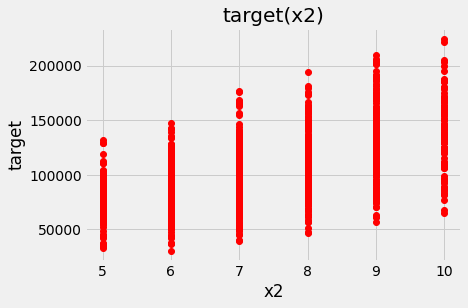

In [ ]:
plt.xlabel("x2")
plt.ylabel("target")
plt.title("target(x2)")
plt.plot(df.x2, df.target, 'or')

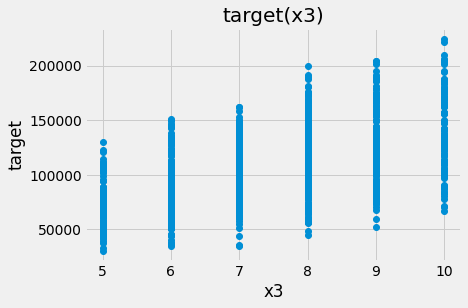

In [ ]:
plt.xlabel("x3")
plt.ylabel("target")
plt.title("target(x3)")
plt.plot(df.x3, df.target, 'o')

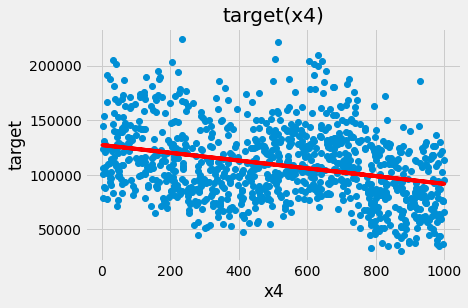

In [ ]:
plt.xlabel("x4")
plt.ylabel("target")
plt.title("target(x4)")
x = df['x4']
y = df['target']
plt.plot(df.x4, df.target, 'o')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

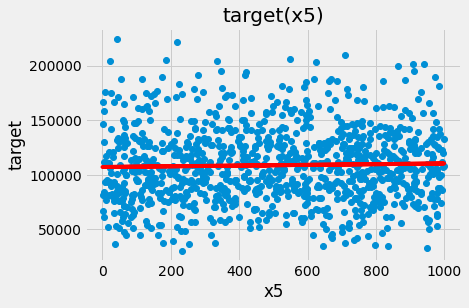

In [ ]:
plt.xlabel("x5")
plt.ylabel("target")
plt.title("target(x5)")
plt.plot(df.x5, df.target, 'o')
x = df['x5']
y = df['target']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"-r")

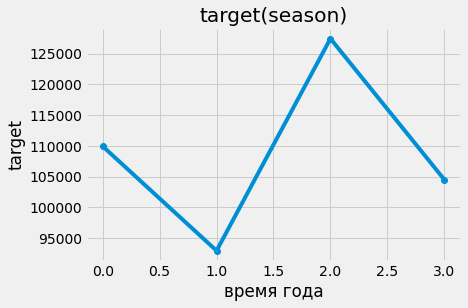

In [ ]:
plt.style.use('fivethirtyeight')
#plt.plot(df.corr())
plt.xlabel("время года")
plt.ylabel("target")
plt.title("target(season)")
season_0 = df[df.seаson_0 == 1]['target'].mean()
seаson_1 = df[df.seаson_1 == 1]['target'].mean()
seаson_2 = df[df.seаson_2 == 1]['target'].mean()
seаson_3 = df[df.seаson_3 == 1]['target'].mean()
plt.plot([0, 1, 2, 3], [season_0, seаson_1, seаson_2, seаson_3], 'o-') 

In [ ]:
#plt.plot(df.corr())

*Correlation*

In [ ]:
df.corr()

,x2,x3,x4,x5,target,seаson_0,seаson_1,seаson_2,seаson_3
x2,1.000000,-0.031210,0.030458,0.047308,0.556719,0.030420,-0.010294,-0.004061,-0.016338
x3,-0.031210,1.000000,0.040714,0.001254,0.522521,-0.009601,0.006544,-0.014959,0.018342
x4,0.030458,0.040714,1.000000,0.010863,-0.297098,0.006076,0.010955,0.013396,-0.030931
x5,0.047308,0.001254,0.010863,1.000000,0.027597,-0.007399,-0.006646,-0.004274,0.018617
target,0.556719,0.522521,-0.297098,0.027597,1.000000,0.019340,-0.267587,0.316556,-0.070209
seаson_0,0.030420,-0.009601,0.006076,-0.007399,0.019340,1.000000,-0.337792,-0.339584,-0.327935
seаson_1,-0.010294,0.006544,0.010955,-0.006646,-0.267587,-0.337792,1.000000,-0.338686,-0.327067
seаson_2,-0.004061,-0.014959,0.013396,-0.004274,0.316556,-0.339584,-0.338686,1.000000,-0.328802
seаson_3,-0.016338,0.018342,-0.030931,0.018617,-0.070209,-0.327935,-0.327067,-0.328802,1.000000


In [ ]:
X = df.drop("target", axis=1)
y = df.target

*Linear regression*

In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.8536848707343445

Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x1=poly.fit_transform(X)
df["xpol"] = poly.fit_transform(X)[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test), lr2.score(X_train, y_train)

(0.8429859641415187, 0.8571495287326012)

KBins

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
t = KBinsDiscretizer(n_bins=15, encode='onehot-dense')
df_disc  = pd.concat([df, pd.DataFrame(t.fit_transform(X))], axis=1)
X = df_disc.drop('target', axis=1)
y = df_disc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
lr3.score(X_test, y_test), lr3.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

(0.941121594373792, 0.9450636953991441)

Cross-*validation*

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
t = KBinsDiscretizer(n_bins=1000, encode='onehot-dense')
#t.fit_transform(X)
df_new = pd.concat([df,pd.DataFrame(t.fit_transform(X))], axis=1).drop(["xpol","x2","x3",'x4','x5','target'], axis=1)

In [ ]:
df_new

,seаson_0,seаson_1,seаson_2,seаson_3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121
0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
996,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
997,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
998,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
cross_validate(LinearRegression(),X_test,y_test,cv=5,scoring="r2",return_train_score=True)

{'fit_time': array([0.00413132, 0.001683  , 0.00162435, 0.00183439, 0.00169969]),
 'score_time': array([0.0012362 , 0.00100803, 0.00108385, 0.00101542, 0.00147486]),
 'test_score': array([0.87670204, 0.91043867, 0.81306291, 0.82155817, 0.86876396]),
 'train_score': array([0.87049978, 0.85721905, 0.88015886, 0.88243001, 0.87299408])}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9552238805970149

In [ ]:
from sklearn.linear_model import LinearRegression
lr5 = LinearRegression()
lr5.fit(X_train, y_train)
lr5.score(X_train, y_train), lr5.score(X_test, y_test)

(0.8461525551244156, 0.8645732825997621)